In [1]:
import pandas as pd
 
# Data.tsv is stored locally in the
# same directory as of this python file
df_metadata = pd.read_csv('food-metadata.tsv',sep = '\t')
display(df_metadata)

FileNotFoundError: [Errno 2] No such file or directory: 'food-metadata.tsv'

In [ ]:
df_metadata.set_index('sample-id', inplace = True)
display (df_metadata)


In [ ]:

print(df_metadata.dtypes)




Text data type is known as Strings in Python, or Objects in Pandas. Strings can contain numbers and / or characters. For example, a string might be a word, a sentence, or several sentences. A Pandas object might also be a plot name like ‘plot1’. A string can also contain or consist of numbers. For instance, ‘1234’ could be stored as a string, as could ‘10.23’. However strings that contain numbers can not be used for mathematical operations! source (https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format/, also includes code for change of data type)


**12.10.22 Milena**

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df_metadata['animal_source'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Animal Source of Samples')
plt.show()

In [ ]:
df_metadata['rindtype'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Rindtypes of Samples')
plt.show()

In [ ]:
df_metadata['style'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Manifacturing styles of Samples')
plt.show()

**NOTE:** Most of samples do not have a value in this column. Only few have a notation about style. 
--> maybe include bar for NA values ?
--> get rid of "categorical" bar

In [ ]:
df_metadata['continent'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Continent of Origin')
plt.show()

In [ ]:
df_metadata['country'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Country of Origin')
plt.show()

In [ ]:
df_metadata['ph'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('pH')
plt.show()

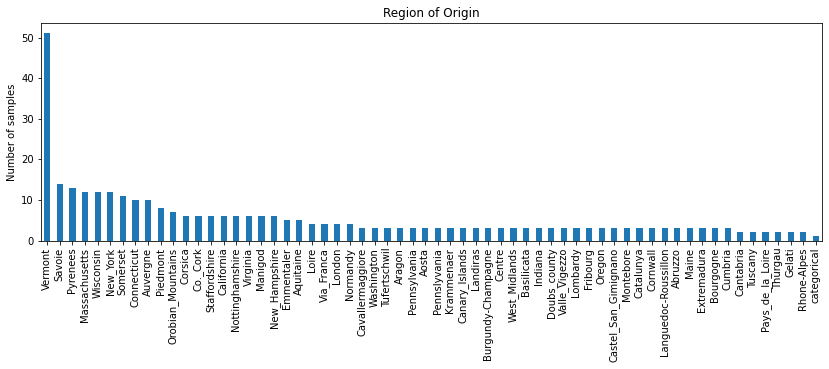

In [ ]:
df_metadata['region'].value_counts().plot(kind='bar', figsize=(14, 4)) #figsize is for changing size of figure
plt.ylabel('Number of samples')
plt.title('Region of Origin')
plt.show()

In [ ]:
pd.set_option('display.max_rows', 62) #changes standard of showing maximum of rows to 62 rows

In [ ]:
df_metadata['region'].value_counts()

Vermont                 51
Savoie                  14
Pyrenees                13
Massachusetts           12
Wisconsin               12
New_York                12
Somerset                11
Connecticut             10
Auvergne                10
Piedmont                 8
Orobian_Mountains        7
Corsica                  6
Co._Cork                 6
Staffordshire            6
California               6
Nottinghamshire          6
Virginia                 6
Manigod                  6
New_Hampshire            6
Emmentaler               5
Aquitaine                5
Loire                    4
Via_Franca               4
London                   4
Normandy                 4
Cavallermaggiore         3
Washington               3
Tufertschwil             3
Aragon                   3
Pennsylvania             3
Aosta                    3
Pennslyvania             3
Krammenaer               3
Canary_Islands           3
Landiras                 3
Burgundy-Champagne       3
Centre                   3
W